In [39]:
import requests
url = 'http://34.172.183.44:8080/'

import json

with open('queries_train.json', 'rt') as f:
  queries = json.load(f)

In [40]:
def average_precision(true_list, predicted_list, k=40):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    for i,doc_id in enumerate(predicted_list):
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    return round(sum(precisions)/len(precisions),3)

In [41]:
def precision_at_k(true_list, predicted_list, k):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    if len(predicted_list) == 0:
        return 0.0
    return round(len([1 for doc_id in predicted_list if doc_id in true_set]) / len(predicted_list), 3)
def recall_at_k(true_list, predicted_list, k):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    if len(true_set) < 1:
        return 1.0
    return round(len([1 for doc_id in predicted_list if doc_id in true_set]) / len(true_set), 3)
def f1_at_k(true_list, predicted_list, k):
    p = precision_at_k(true_list, predicted_list, k)
    r = recall_at_k(true_list, predicted_list, k)
    if p == 0.0 or r == 0.0:
        return 0.0
    return round(2.0 / (1.0/p + 1.0/r), 3)
def results_quality(true_list, predicted_list):
    p5 = precision_at_k(true_list, predicted_list, 5)
    f1_30 = f1_at_k(true_list, predicted_list, 30)
    if p5 == 0.0 or f1_30 == 0.0:
        return 0.0
    return round(2.0 / (1.0/p5 + 1.0/f1_30), 3)

assert precision_at_k(range(10), [1,2,3] , 2) == 1.0
assert recall_at_k(   range(10), [10,5,3], 2) == 0.1
assert precision_at_k(range(10), []      , 2) == 0.0
assert precision_at_k([],        [1,2,3],  5) == 0.0
assert recall_at_k(   [],        [10,5,3], 2) == 1.0
assert recall_at_k(   range(10), [],       2) == 0.0
assert f1_at_k(       [],        [1,2,3],  5) == 0.0
assert f1_at_k(       range(10), [],       2) == 0.0
assert f1_at_k(       range(10), [0,1,2],  2) == 0.333
assert f1_at_k(       range(50), range(5), 30) == 0.182
assert f1_at_k(       range(50), range(10), 30) == 0.333
assert f1_at_k(       range(50), range(30), 30) == 0.75
assert results_quality(range(50), range(5))  == 0.308
assert results_quality(range(50), range(10)) == 0.5
assert results_quality(range(50), range(30)) == 0.857
assert results_quality(range(50), [-1]*5 + list(range(5,30))) == 0.0


In [62]:
import requests
from time import time
# url = 'http://35.232.59.3:8080'
# place the domain you got from ngrok or GCP IP below.
url = 'http://34.172.183.44:8080/'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      rq = results_quality(true_wids, pred_wids)
  except:
    pass

  qs_res.append((q, duration, rq))

In [63]:
print(qs_res)

[('genetics', 0.48731350898742676, 0.642), ('Who is considered the "Father of the United States"?', 12.666671752929688, 0.044), ('economic', 1.3981282711029053, 0.487), ('When was the United Nations founded?', 12.262859106063843, 0.046), ('video gaming', 3.880255937576294, 0.14), ('3D printing technology', 2.0740973949432373, 0.583), ('Who is the author of "1984"?', 3.3350441455841064, 0.0), ('bioinformatics', 0.34637022018432617, 0.608), ('Who is known for proposing the heliocentric model of the solar system?', 8.832427024841309, 0.509), ('Describe the process of water erosion.', 5.18838357925415, 0.5), ('When was the Berlin Wall constructed?', 3.1156489849090576, 0.551), ('What is the meaning of the term "Habeas Corpus"?', 3.5788822174072266, 0.672), ('telecommunications', 0.4589965343475342, 0.122), ('internet', 0.746896505355835, 0.595), ('What are the characteristics of a chemical element?', 1.6559348106384277, 0.422), ('Describe the structure of a plant cell.', 5.095145225524902,

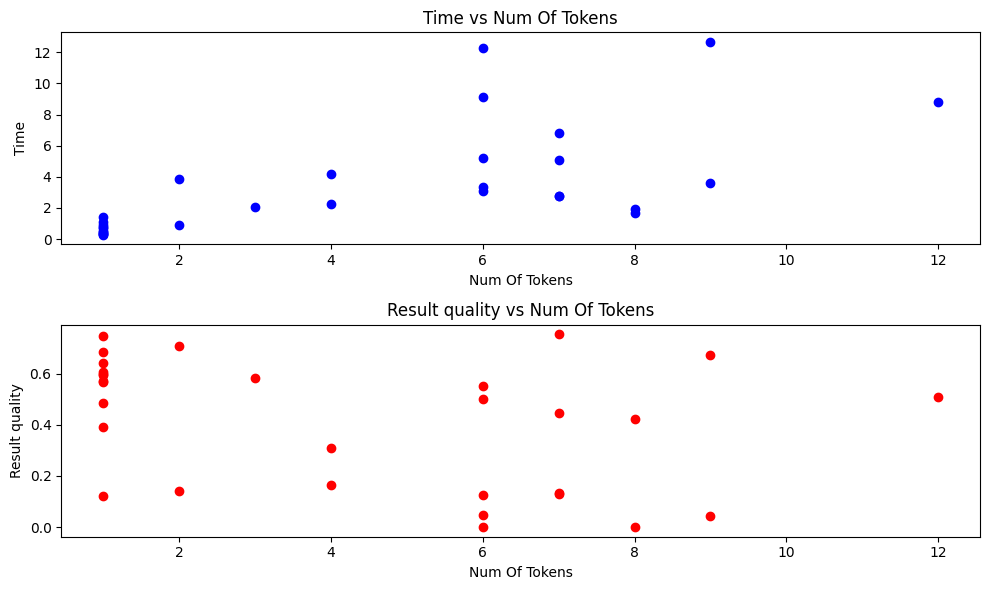

[('Who is considered the "Father of the United States"?', 12.666671752929688, 0.044), ('When was the United Nations founded?', 12.262859106063843, 0.046), ('When did World War II end?', 9.132122993469238, 0.126), ('Who is known for proposing the heliocentric model of the solar system?', 8.832427024841309, 0.509), ('When did the Black Death pandemic occur?', 6.8048295974731445, 0.445), ('Describe the process of water erosion.', 5.18838357925415, 0.5), ('Describe the structure of a plant cell.', 5.095145225524902, 0.135), ('Describe the water cycle.', 4.169081449508667, 0.165), ('video gaming', 3.880255937576294, 0.14), ('What is the meaning of the term "Habeas Corpus"?', 3.5788822174072266, 0.672), ('Who is the author of "1984"?', 3.3350441455841064, 0.0), ('When was the Berlin Wall constructed?', 3.1156489849090576, 0.551), ('Who is the founder of modern psychology?', 2.78135347366333, 0.128), ('When was the Gutenberg printing press invented?', 2.745490074157715, 0.754), ('Who painted 

In [64]:
import matplotlib.pyplot as plt
data=qs_res

words = [item[0] for item in data]
times = [item[1] for item in data]
qualities = [item[2] for item in data]
# Calculate word lengths
num_words = [len(word.split()) for word in words]

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.scatter(num_words, times, color='b')
plt.title('Time vs Num Of Tokens')
plt.xlabel('Num Of Tokens')
plt.ylabel('Time')

plt.subplot(2, 1, 2)
plt.scatter(num_words, qualities, color='r')
plt.title('Result quality vs Num Of Tokens')
plt.xlabel('Num Of Tokens')
plt.ylabel('Result quality')

plt.tight_layout()
plt.show()
sorted_data_by_duration_desc = sorted(data, key=lambda x: x[1], reverse=True)
sorted_data_by_quality_desc = sorted(data, key=lambda x: x[2], reverse=True)

print(sorted_data_by_duration_desc)
print(sorted_data_by_quality_desc)
noquality=[item for item in data if item[2]==0]
print(noquality)